In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
input_image_path = "Images/sample_img_3.png"

In [40]:
## Read
img = cv2.imread(input_image_path)

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


mask = cv2.inRange(hsv, (37, 52, 68), (94, 255, 139))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

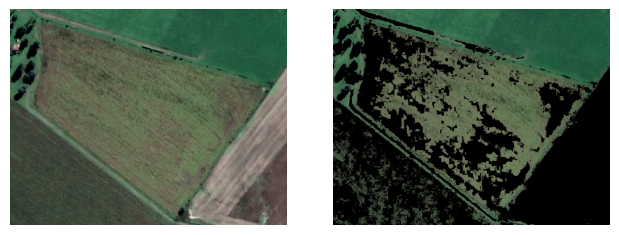

In [41]:
save = False
if save:
    ## save
    cv2.imwrite("green3.png", green)
else:
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2)

    # Display the first image in the first subplot
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')

    # Adjust the layout
    plt.tight_layout()

    # Show the plot with both images
    axs[1].imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))
    axs[1].axis('off')
    plt.show()

In [42]:
green_ratio = np.count_nonzero(mask) / (mask.shape[0] * mask.shape[1])
print("The green surface area is of ", round(green_ratio * 100, 2), "%")

The green surface area is of  50.65 %


In [43]:
green

array([[[ 81, 115,  62],
        [ 82, 116,  62],
        [ 84, 118,  65],
        ...,
        [ 62,  87,  31],
        [ 60,  85,  29],
        [ 56,  81,  25]],

       [[ 80, 114,  60],
        [ 80, 114,  60],
        [ 83, 117,  63],
        ...,
        [ 59,  84,  28],
        [ 58,  83,  27],
        [ 56,  81,  25]],

       [[ 78, 112,  58],
        [ 78, 112,  58],
        [ 81, 115,  61],
        ...,
        [ 56,  81,  25],
        [ 58,  83,  27],
        [ 58,  83,  27]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]